## Analysis of blood sugar data

Install necessary dependencies

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('Ivan_data.csv', parse_dates=[0])
df = df.iloc[9849:118339, :]
date_time = df['Date-time']
df.set_index('Date-time', inplace=True)
display(df)


,Blood-sugar
Date-time,
2019-01-01 00:12:00,267
2019-01-01 00:27:00,289
2019-01-01 00:42:00,299
2019-01-01 00:57:00,302
2019-01-01 01:12:00,302
...,...
2021-12-31 22:44:00,79
2021-12-31 22:59:00,108
2021-12-31 23:14:00,128


Plot of all interpolated data

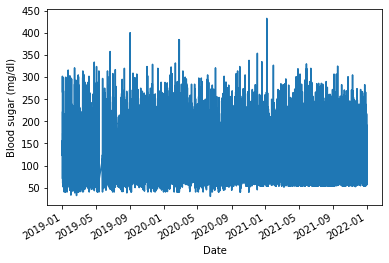

In [20]:
df['Blood-sugar'].plot()
plt.xlabel('Date')
plt.ylabel('Blood sugar (mg/dl)')
plt.savefig('Figures/year_of_data.pdf', bbox_inches='tight')

Last week of data

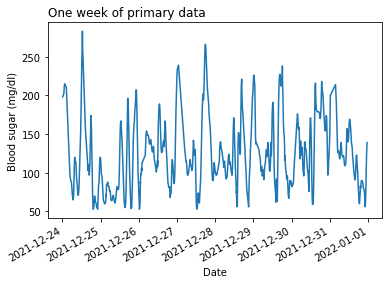

In [31]:
df['Blood-sugar'][-771:-1].plot()
plt.xlabel('Date') 
plt.ylabel('Blood sugar (mg/dl)')
plt.title("One week of primary data", loc='left')
plt.savefig('Figures/week_of_data.pdf', bbox_inches='tight')

Last full day of data

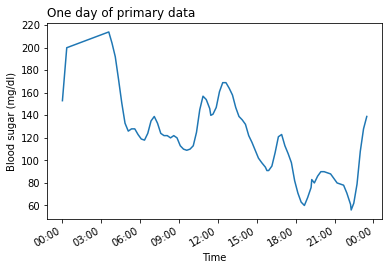

In [60]:
df['Blood-sugar'][-87:-1].plot()
xformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.xlabel('Time')
plt.ylabel('Blood sugar (mg/dl)')
plt.title("One day of primary data", loc='left')
plt.savefig('Figures/day_of_data.pdf', bbox_inches='tight')

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Blood-sugar,108490.0,134.245792,50.170857,30.0,96.0,129.0,166.0,433.0


### Fast Fourier Transform

Determines which frequencies are important

In [12]:
fft = tf.signal.rfft(df['Blood-sugar'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['Blood-sugar'])
hours_per_week = 24*7
weeks_per_dataset = n_samples_h/(hours_per_week)

f_per_year = f_per_dataset/weeks_per_dataset

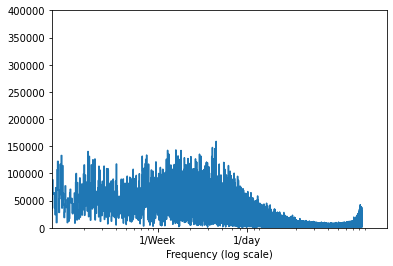

In [13]:
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)

plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 7], labels=['1/Week', '1/day'])
plt.xlabel('Frequency (log scale)')
plt.show()
